In [1]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

kernel = np.ones(shape=(5,5), dtype=np.float32) / 25
kernel

dst1 = cv2.filter2D(src, -1, kernel)
dst2 = cv2.blur(src, (3,3))

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()

cv2.destroyAllWindows()

In [2]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for ksize in (3, 5, 7):
    dst = cv2.blur(src, (ksize, ksize))

    desc = 'Mean: {}x{}'.format(ksize, ksize)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)
    
    win_name = f'dst_{ksize}x{ksize}'
    cv2.imshow(win_name, dst)
    


cv2.waitKey()

cv2.destroyAllWindows()    


In [3]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

cv2.imshow('src', src)

for sigma in range(1, 6):
    dst = cv2.GaussianBlur(src, (0, 0), sigma)

    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10, 30), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                1.0, 255, 1, cv2.LINE_AA)
    
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

In [4]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/rose.bmp', cv2.IMREAD_GRAYSCALE)

if src is None:
    print('Image load failed!')
    sys.exit()

blr = cv2.GaussianBlur(src, (0, 0), 2)
dst = np.clip(2.0*src - blr, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('blr', blr)
cv2.imshow('dst', dst)



cv2.waitKey()

cv2.destroyAllWindows()

In [5]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/rose.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

src_f = src_ycrcb[:, :, 0].astype(np.float32)
src_ycrcb[:, :, 0] = np.clip(2.0 * src_f - blr, 0, 255).astype(np.uint8)

dst = cv2.cvtColor(src_ycrcb, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst)



cv2.waitKey()

cv2.destroyAllWindows()

In [6]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/noise.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.medianBlur(src, 3)

cv2.imshow('src', src)
cv2.imshow('dst', dst)



cv2.waitKey()

cv2.destroyAllWindows()

In [7]:
import sys
import cv2
import numpy as np

src = cv2.imread('./data/lenna.bmp')

if src is None:
    print('Image load failed!')
    sys.exit()

dst = cv2.bilateralFilter(src, -1, 10, 5)

cv2.imshow('src', src)
cv2.imshow('dst', dst)



cv2.waitKey()

cv2.destroyAllWindows()

In [8]:
import sys
import cv2
import numpy as np

def cartoon_filter(img):
    h, w = img.shape[:2]
    img2 = cv2.resize(img, (w//2, h//2))

    blr = cv2.bilateralFilter(img2, -1, 20, 7)
    edge = 255 - cv2.Canny(img2, 80, 120)
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

    dst = cv2.bitwise_and(blr, edge)
    dst = cv2.resize(dst, (w, h), interpolation=cv2.INTER_NEAREST)

    return dst

def pencil_sketch(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blr = cv2.GaussianBlur(gray, (0, 0), 3)
    dst = cv2.divide(gray, blr, scale=255)
    
    return dst


cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('video open failed!')
    sys.exit()

cam_mode = 0

while True:
    ret, frame, = cap.read()

    if not ret:
        break

    # frame = cv2.flip(frame, 1) 

    if cam_mode == 1:
        frame = cartoon_filter(frame)
    elif cam_mode == 2:
        frame = pencil_sketch(frame)
        frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)


    cv2.imshow('frame', frame)
    key = cv2.waitKey(1)

    if key == 27:
        break
    elif key == ord(' '):
        cam_mode += 1
        if cam_mode == 3:
            cam_mode = 0

cap.release()
cv2.destroyAllWindows()         


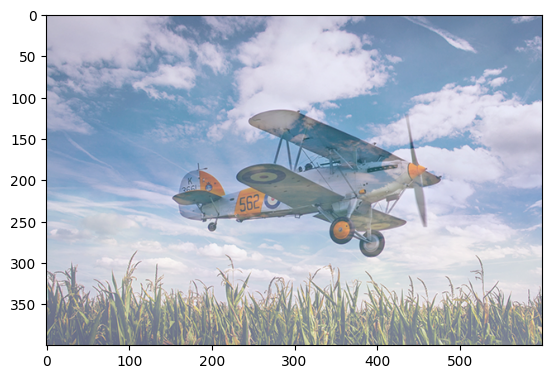

In [9]:
import matplotlib.pyplot as plt

src1 = cv2.imread("./data/airplane.bmp")
src2 = cv2.imread("./data/field.bmp")

# resize_src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.addWeighted(src1=src1, alpha=0.5, src2=src2, beta=0.5, gamma=0)
show_dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(show_dst)

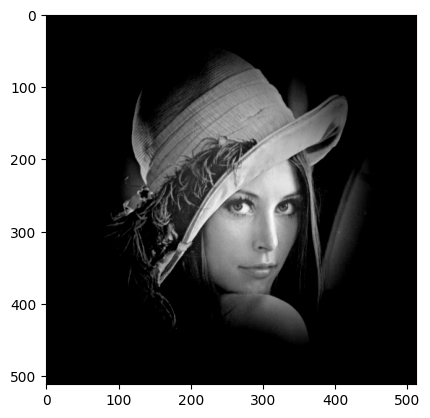

In [10]:

src1 = cv2.imread("./data/lenna.bmp" , cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread("./data/circle.jpg" , cv2.IMREAD_GRAYSCALE)

src2 = cv2.resize(src2, (src1.shape[1], src1.shape[0]))

dst = cv2.subtract(src1, src2)

plt.imshow(dst, cmap="gray")

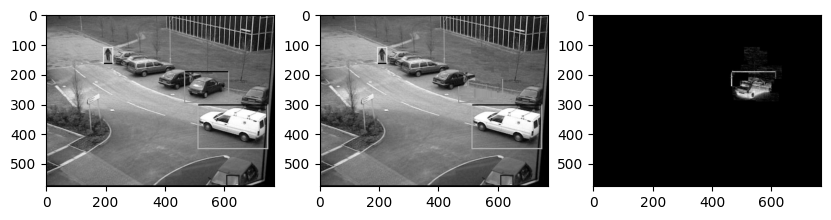

In [11]:

img1 = cv2.imread("./data/road1.jpg" , cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("./data/road2.jpg" , cv2.IMREAD_GRAYSCALE)

dst = cv2.absdiff(img1, img2)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 3, 1)
plt.imshow(img1, cmap="gray")

fig.add_subplot(1, 3, 2)
plt.imshow(img2, cmap="gray")

fig.add_subplot(1, 3, 3)
plt.imshow(dst, cmap="gray")

In [12]:
import cv2

cap = cv2.VideoCapture("/dev/video0")

if not cap.isOpened():
    raise RuntimeError("ERROR! Unable to open camera")

try:
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"width = {width}, height = {height}")

    fourcc = cv2.VideoWriter_fourcc(*"DIVX")
    out = cv2.VideoWriter("./motion_diff.avi", fourcc, 20, (width, height), isColor=False)

    prev_gray = None  # 이전 프레임 저장용

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        if prev_gray is None:
            prev_gray = gray
            continue

        # 현재 프레임과 이전 프레임의 차이 계산
        diff = cv2.absdiff(prev_gray, gray)

        # 차이를 시각적으로 보기 좋게 하기 위해 threshold
        _, diff_thresh = cv2.threshold(diff, 30, 255, cv2.THRESH_BINARY)

        # 화면 출력
        cv2.imshow("diff", diff_thresh)

        # 결과 저장 (원하면 gray 대신 diff_thresh 저장 가능)
        out.write(diff_thresh)

        prev_gray = gray  # 현재 프레임을 이전 프레임으로 업데이트

        if cv2.waitKey(1) == 27:  # ESC 키
            break

finally:
    cap.release()
    out.release()
    cv2.destroyAllWindows()

width = 640, height = 480


In [13]:
import cv2

cap = cv2.VideoCapture("/dev/video0")

if not cap.isOpened():
    raise RuntimeError("ERROR! Unable to open camera")

try:
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"width = {width}, height = {height}")

    fourcc = cv2.VideoWriter_fourcc(*"DIVX")
    out = cv2.VideoWriter("./color_motion_diff.avi", fourcc, 20, (width, height))

    prev = None

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = cv2.flip(frame, 1)

        if prev is None:
            prev = frame
            continue

        diff = cv2.absdiff(prev, frame)

        # 선택사항: 차이가 작으면 보기 힘드니 임계처리하거나 증폭 가능
        diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
        _, mask = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)

        # 컬러 diff에 mask 적용해서 변화 있는 부분만 강조
        diff_highlight = cv2.bitwise_and(diff, diff, mask=mask)

        cv2.imshow("color diff", diff_highlight)
        out.write(diff_highlight)

        prev = frame

        if cv2.waitKey(1) == 27:
            break

finally:
    cap.release()
    out.release()
    cv2.destroyAllWindows()


width = 640, height = 480


In [14]:
import cv2
import numpy as np
from collections import deque

cap = cv2.VideoCapture("/dev/video0")

if not cap.isOpened():
    raise RuntimeError("ERROR! Unable to open camera")

frame_buffer = deque(maxlen=4)  # 최대 4프레임 저장

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)
    frame_buffer.append(frame.copy())  # 현재 프레임을 버퍼에 저장

    if len(frame_buffer) < 4:
        continue  # 아직 3프레임 누적 안 됐으면 기다림

    # 현재 프레임과 3프레임 전 비교
    prev = frame_buffer[0]  # 3프레임 전
    curr = frame_buffer[-1] # 현재 프레임

    diff = cv2.absdiff(prev, curr)

    # 수치 계산
    diff_sum = np.sum(diff)
    diff_mean = np.mean(diff)
    diff_gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, diff_thresh = cv2.threshold(diff_gray, 30, 255, cv2.THRESH_BINARY)
    changed_pixels = cv2.countNonZero(diff_thresh)

    # 결과 출력
    print(f"[DIFF 3-frame] sum: {diff_sum:,}, mean: {diff_mean:.2f}, changed pixels: {changed_pixels}")

    # 시각화
    cv2.imshow("3-frame diff", diff_thresh)

    if cv2.waitKey(1) == 27:  # ESC
        break

cap.release()
cv2.destroyAllWindows()


[DIFF 3-frame] sum: 2,593,334, mean: 2.81, changed pixels: 187
[DIFF 3-frame] sum: 3,314,470, mean: 3.60, changed pixels: 947
[DIFF 3-frame] sum: 3,364,464, mean: 3.65, changed pixels: 702
[DIFF 3-frame] sum: 2,624,767, mean: 2.85, changed pixels: 234
[DIFF 3-frame] sum: 3,141,150, mean: 3.41, changed pixels: 679
[DIFF 3-frame] sum: 3,209,734, mean: 3.48, changed pixels: 589
[DIFF 3-frame] sum: 2,711,039, mean: 2.94, changed pixels: 188
[DIFF 3-frame] sum: 2,546,171, mean: 2.76, changed pixels: 207
[DIFF 3-frame] sum: 2,897,328, mean: 3.14, changed pixels: 327
[DIFF 3-frame] sum: 3,129,485, mean: 3.40, changed pixels: 549
[DIFF 3-frame] sum: 2,559,584, mean: 2.78, changed pixels: 115
[DIFF 3-frame] sum: 2,657,636, mean: 2.88, changed pixels: 93
[DIFF 3-frame] sum: 2,996,750, mean: 3.25, changed pixels: 392
[DIFF 3-frame] sum: 2,784,721, mean: 3.02, changed pixels: 63
[DIFF 3-frame] sum: 2,446,460, mean: 2.65, changed pixels: 47
[DIFF 3-frame] sum: 2,960,848, mean: 3.21, changed pixels:

In [15]:
src = cv2.imread("./data/lenna.bmp", cv2.IMREAD_GRAYSCALE)

alpha = 1.0
dst = np.clip((1+alpha)*src - 128*alpha, 0, 255).astype(np.uint8)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
import sys
import numpy as np
import cv2

src = cv2.imread("./data/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)
src = cv2.resize(src, (567, 379))

if src is None:
    print("Image load failed!")
    sys.exit()


dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()



In [17]:
import sys
import numpy as np
import cv2

src = cv2.imread("./data/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)
src = cv2.resize(src, (567, 379))

if src is None:
    print("Image load failed!")
    sys.exit()


dst = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

# src = cv2.imread("./data/filed.bmp")

# if src is None:
#     print("Image load failed!")
#     sys.exit()

# src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
# ycrcb_planes = cv2.split(src_ycrcb)

# ycrcb_planes[0] = cv2.equalizeHist(ycrcb_planes[0])

# dst_ycvcb =cv2.merge(ycrcb_plane)
# dst = cv2.cvtColor(dst_ycvcb, cv2.COLOR_YCrCb2BGR)

# cv2.imshow('src', src)
# cv2.imshow('dst', dst)
# cv2.waitKey()
# cv2.destroyAllWindows()



In [18]:
import sys
import numpy as np
import cv2

src1 = cv2.imread("./data/candies.png")

if src1 is None:
    print("Image load failed!")
    sys.exit()


src2 = cv2.imread("./data/candies2.png")

if src2 is None:
    print("Image load failed!")
    sys.exit()

src1_hsv = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
src2_hsv = cv2.cvtColor(src2, cv2.COLOR_BGR2HSV)

dst1_1 = cv2.inRange(src1, (0, 128, 0), (100, 255, 100))
dst1_2 = cv2.inRange(src1_hsv, (50, 150, 0), (80, 255, 255))
dst2_1 = cv2.inRange(src2, (0, 128, 0), (100, 255, 100))
dst2_2 = cv2.inRange(src2_hsv, (50, 150, 0), (80, 255, 255))

cv2.imshow('src1', src1)
cv2.imshow('dst1_1', dst1_1)
cv2.imshow('dst1_2', dst1_2)

cv2.imshow('src2', src2)
cv2.imshow('dst2_1', dst2_1)
cv2.imshow('dst2_2', dst2_2)

cv2.waitKey()
cv2.destroyAllWindows()


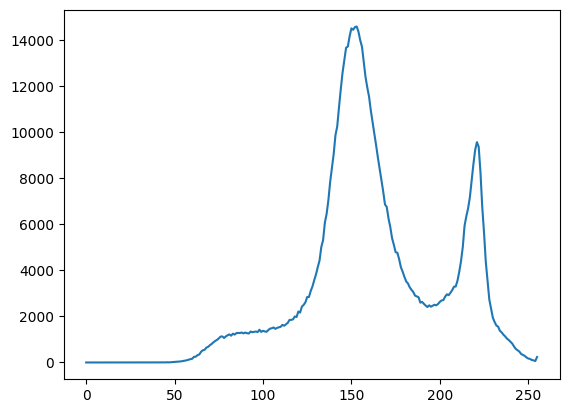

In [19]:
import cv2
import matplotlib.pyplot as plt

dark_horse = cv2.imread("./data/horse.png")
show_horse = cv2.cvtColor(dark_horse, cv2.COLOR_BGR2RGB)

rainbow = cv2.imread("./data/rainbow.jpg")
show_rainbow = cv2.cvtColor(rainbow, cv2.COLOR_BGR2RGB)

bricks = cv2.imread("./data/bricks.jpg")
show_bricks = cv2.cvtColor(bricks, cv2.COLOR_BGR2RGB)

hist_values = cv2.calcHist(
    [bricks], channels=[0], mask=None, histSize=[256], ranges=[0,256]
)

hist_values.shape

plt.plot(hist_values)

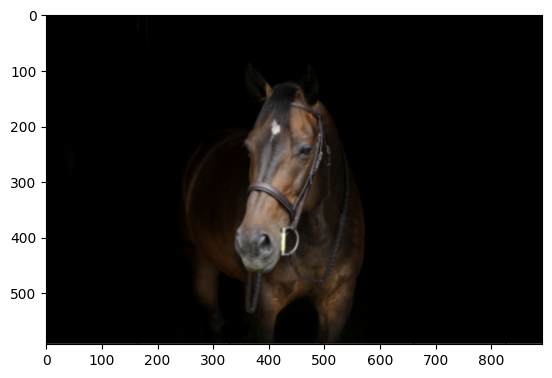

In [20]:
plt.imshow(show_horse)

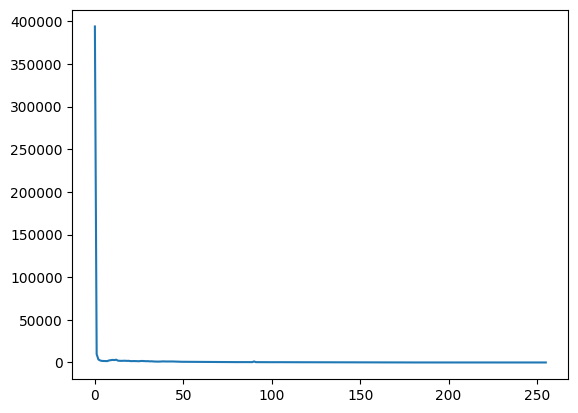

In [21]:
hist_values = cv2.calcHist(
    [show_horse], channels=[0], mask=None, histSize=[256], ranges=[0,256]
)

hist_values.shape

plt.plot(hist_values)

In [22]:
def show_histograming(img, title, xmax, ymax=None):
    color = ("b", "g", "r")
    for i, clr in enumerate(color):
        hisrt = cv2.calcHist(
            [img], channels=[i], mask=None, histSize=[256], ranges=[0, 256]
        )
        plt.plot(hisrt, color=clr)
        plt.xlim([0, xmax])
        if ymax != None:
            plt.ylim([0, ymax])
            
    plt.title(title)        

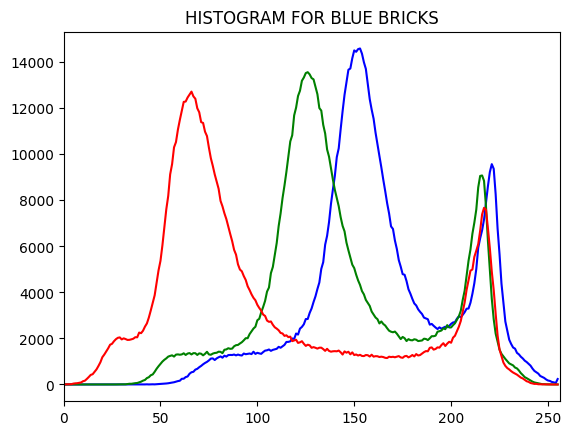

In [23]:
show_histograming(bricks, "HISTOGRAM FOR BLUE BRICKS", 256)

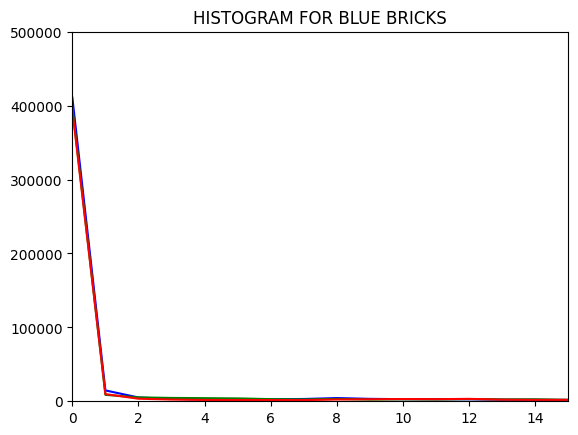

In [24]:
show_histograming(dark_horse, "HISTOGRAM FOR BLUE BRICKS", 15, 500000)

In [25]:
def display_img(img, cmap=None):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap)

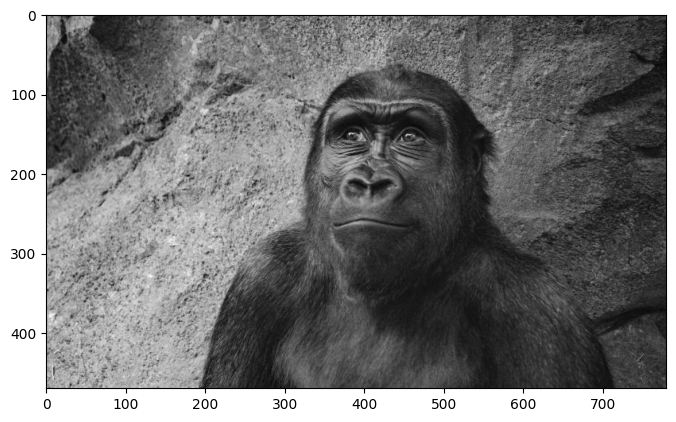

In [26]:
gorilla = cv2.imread("./data/gorilla.jpg", cv2.IMREAD_GRAYSCALE)
display_img(gorilla, cmap="gray")

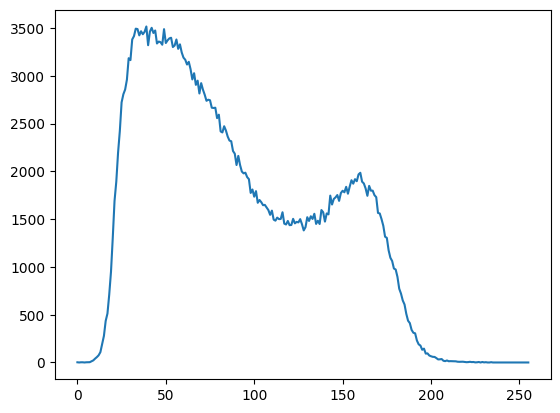

In [27]:
hist_values = cv2.calcHist(
    [gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]
)


plt.plot(hist_values)

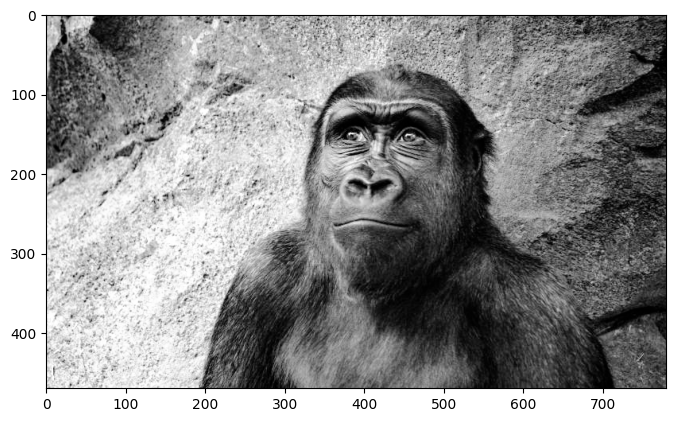

In [28]:
eq_gorilla = cv2.equalizeHist(gorilla)
display_img(eq_gorilla, cmap="gray")

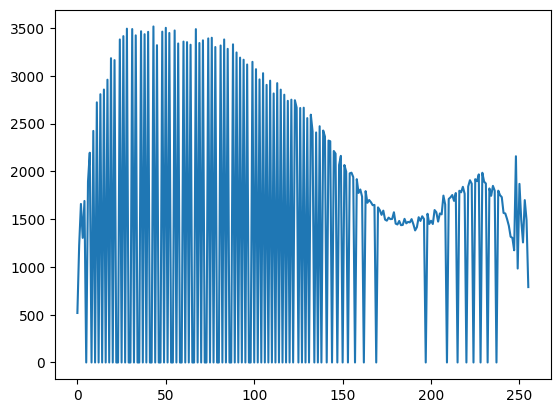

In [29]:
hist_values = cv2.calcHist(
    [eq_gorilla], channels=[0], mask=None, histSize=[256], ranges=[0,256]
)


plt.plot(hist_values)

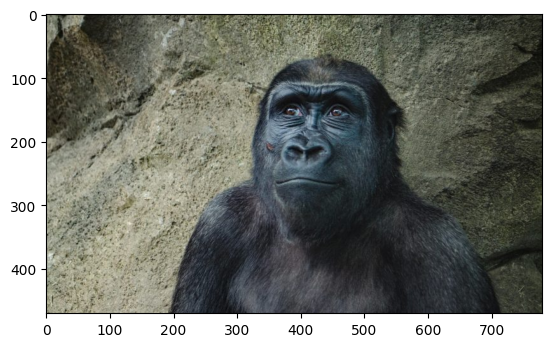

In [30]:
color_gorilla = cv2.imread("./data/gorilla.jpg")
show_color_gorilla = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2RGB)
plt.imshow(show_color_gorilla)

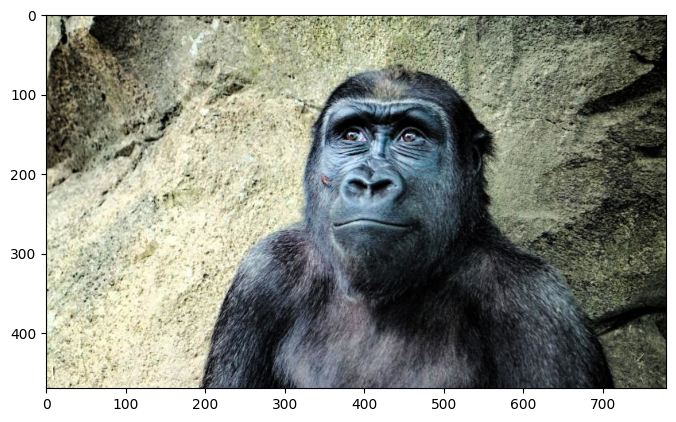

In [31]:
hsv = cv2.cvtColor(color_gorilla, cv2.COLOR_BGR2HSV)
hsv[:, :, 2] = cv2.equalizeHist(hsv[:, :, 2])
equalized_color_gorilla = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
display_img(equalized_color_gorilla)

In [8]:
src = cv2.imread("./data/messi5.jpg")

aff = np.array([[1,0,200],[0,1,100]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [9]:
src1 = cv2.imread("./data/messi5.jpg")

aff = np.array([[1,0.5,0],[0,1,0]], dtype=np.float32)

h, w = src.shape[:2
                 ]
dst1 = cv2.warpAffine(src, aff, (w + int(h * 0.5), h ))

cv2.imshow('src', src1)
cv2.imshow('dst', dst1)

cv2.waitKey()
cv2.destroyAllWindows()

In [34]:
src = cv2.imread("./data/rose.bmp")

if src is None:
    print ('Image load failed')
    sys.exit()


dst11 = cv2.resize(src, (0, 0), fx=4, fy=4, interpolation=cv2.INTER_NEAREST)    
dst12 = cv2.resize(src, (1920, 1280))
dst13 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_CUBIC) 
dst14 = cv2.resize(src, (1920, 1280), interpolation=cv2.INTER_LANCZOS4)  



# cv2.imshow('src', src)
cv2.imshow('dst', dst11)
cv2.imshow('src', dst12 [500:900, 400:800])
cv2.imshow('dst', dst13 [500:900, 400:800])
cv2.imshow('dst', dst14 [500:900, 400:800])


cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
import math
import numpy as np
import math


src = cv2.imread("./data/rose.bmp")

rad = 20 * math.pi / 180
aff = np.array([[ math.cos(rad),  math.sin(rad), 0],
                [-math.sin(rad),  math.cos(rad), 0]], dtype=np.float32)

dst = cv2.warpAffine(src, aff, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
src = cv2.imread("./data/rose.bmp")

if src is None:
    print ('Image load failed')
    sys.exit()

cp = (src.shape[1]/2, src.shape[0]/2)
rot = cv2.getRotationMatrix2D(cp, 20, 0.7)

dst = cv2.warpAffine(src, rot, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [37]:
import cv2
import numpy as np

src = cv2.imread("./data/pinkwink_namecard.png")

if src is None:
    print ('Image load failed')
    sys.exit()

w, h = 720, 400
srcQuad = np.array([[606, 286], [1498, 386],[1568, 842],[408, 682]], np.float32)
dstQuad = np.array([[0, 0], [w-1, 0],[w-1, h-1], [0, h-1]], np.float32)

pers = cv2.getPerspectiveTransform(srcQuad, dstQuad)
dst = cv2.warpPerspective(src, pers, (w,h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
while True:
    if cv2.waitKey() == 27:
        break

cv2.waitKey()
cv2.destroyAllWindows()


In [38]:
import cv2

src = cv2.imread("./data/pinkwink_namecard.png")

cv2.imshow('src', src)

cv2.waitKey()
cv2.destroyAllWindows()

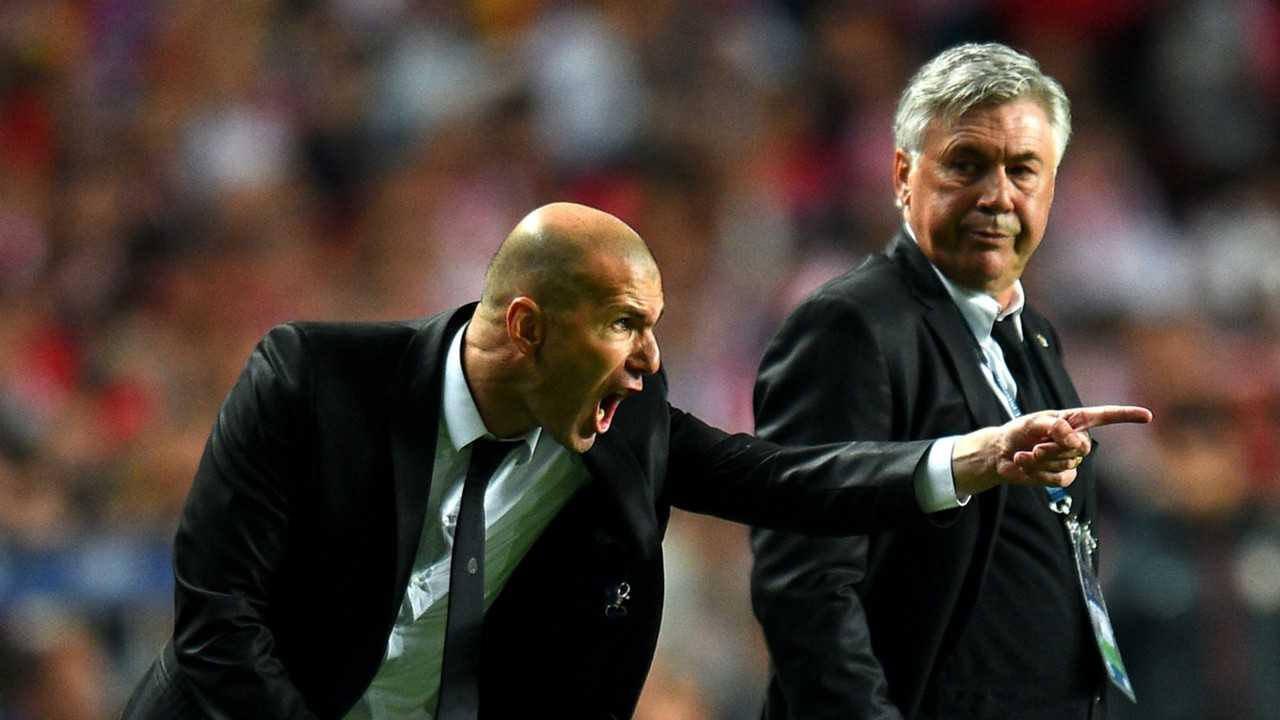

In [39]:
from IPython.display import Image, clear_output, display

display(Image(data='./data/download.jpeg', width=500))

In [10]:
from IPython.display import Image, clear_output, display
import cv2, time

def display_image(frame, interval=0.03):
    _, buffer = cv2.imencode('.jpg', frame)
    clear_output(wait=True)
    display(Image(data=buffer, width=500))
    time.sleep(interval)

In [11]:
camera_index = 0
def init_cam(camera_index=camera_index):
    cap = cv2.VideoCapture(camera_index)
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)
    #cap.set(cv2.CAP_PROP_FPS, 10)

    return cap

In [12]:
def run_camera(duration=5, camera_index=0):
    cap = init_cam(camera_index=camera_index)

    start = time.time()
    while time.time() - start < duration:
        ret, frame = cap.read()
        display_image(frame)

    cap.release()

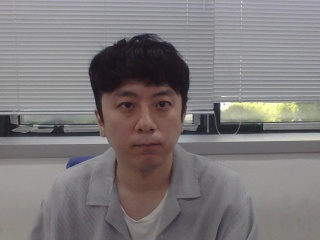

In [14]:
run_camera(duration=5)

In [17]:
def get_edge(frame, threshold1, threshold2):
    gray_image = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    return cv2.Canny(gray_image, threshold1, threshold2)

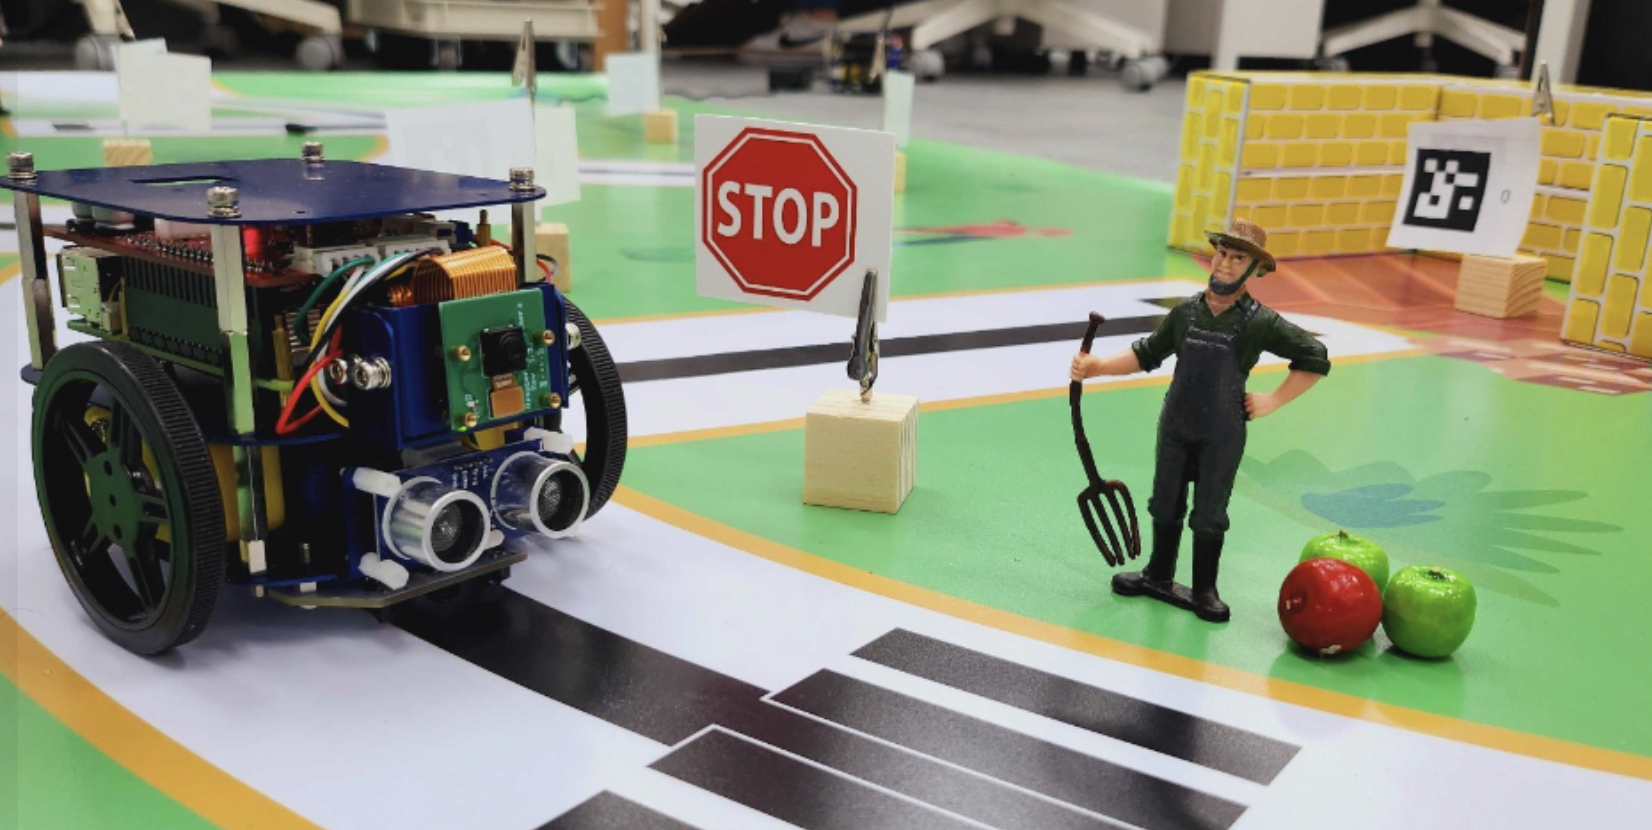

In [18]:
display(Image(data='./data/download1.jpeg', width=500))


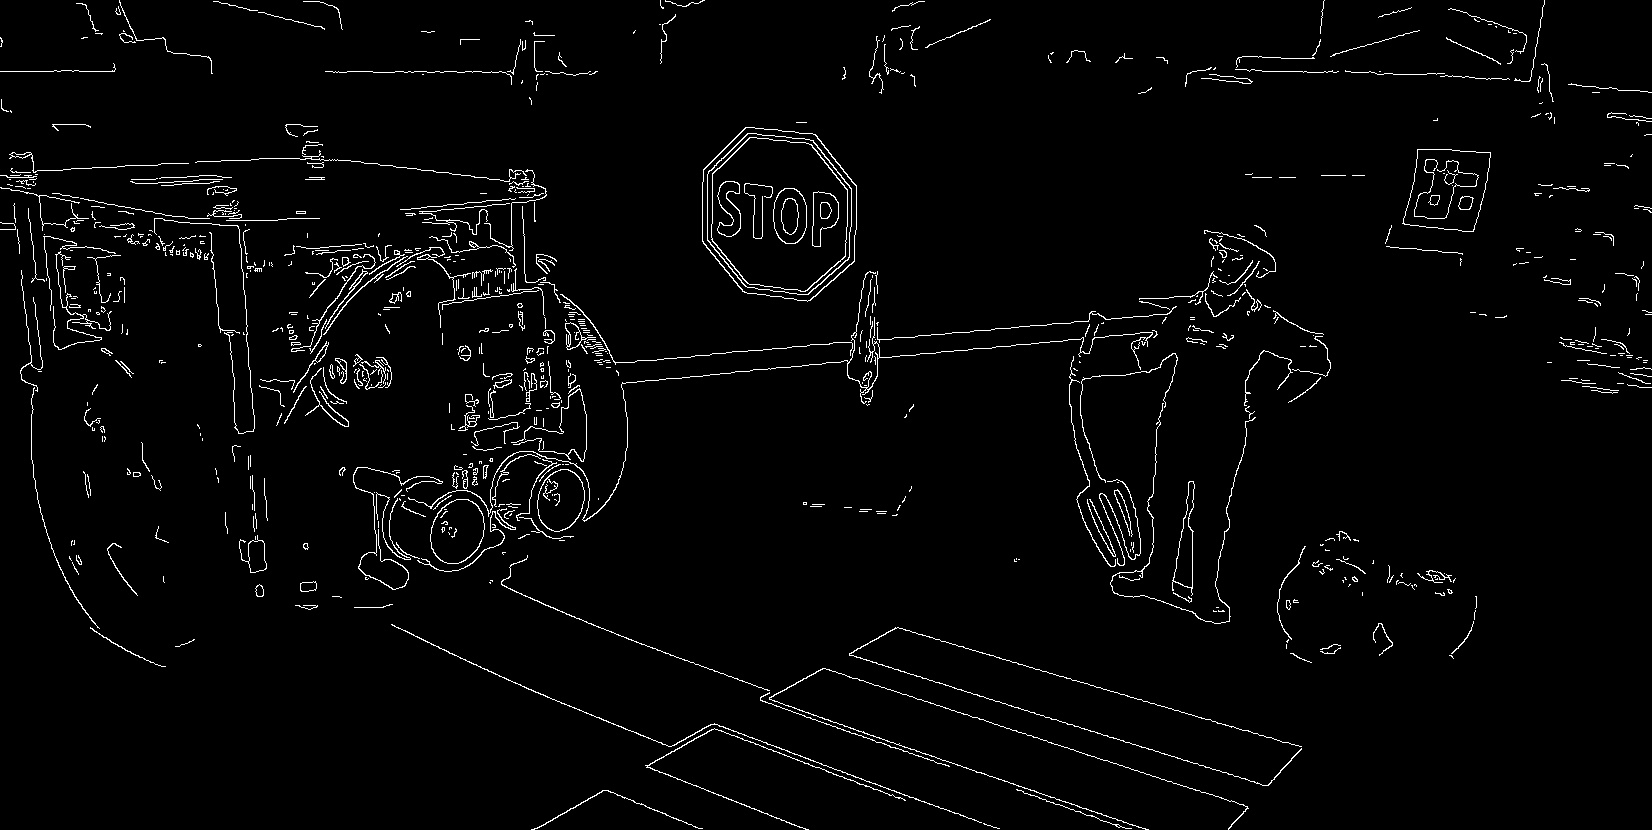

In [19]:
sample = cv2.imread('./data/download1.jpeg')
edge_frame = get_edge(sample, threshold1=150, threshold2=200)
display_image(edge_frame)

In [22]:
def run_edge(duration=5, camera_index=0, threshold1=100, threshold2=150):
    cap = init_cam(camera_index=camera_index)

    start = time.time()
    while time.time() - start < duration:
        ret, frame = cap.read()
        edge_frame = get_edge(frame, threshold1=threshold1, threshold2=threshold2)
        edge_frame = cv2.bitwise_not(edge_frame) # 배경 검정색에서 하얀색으로
        # edge_frame = 255 - edge_frame
        display_image(edge_frame)

    cap.release()

run_edge(threshold1=80, threshold2=150)    

[ WARN:0@9331.167] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@9331.167] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [21]:
import numpy as np

def convert_hsv(frame, ss, vs):
    hsv_image = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    H, S, V = cv2.split(hsv_image)

    S = np.clip(S * ss, 0, 255)  # Saturation
    S = np.uint8(S)
    V = np.clip(V * vs, 0, 255)      # Value
    V = np.uint8(V)
    hsv_image = cv2.merge( (H,S,V) )
    
    return cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

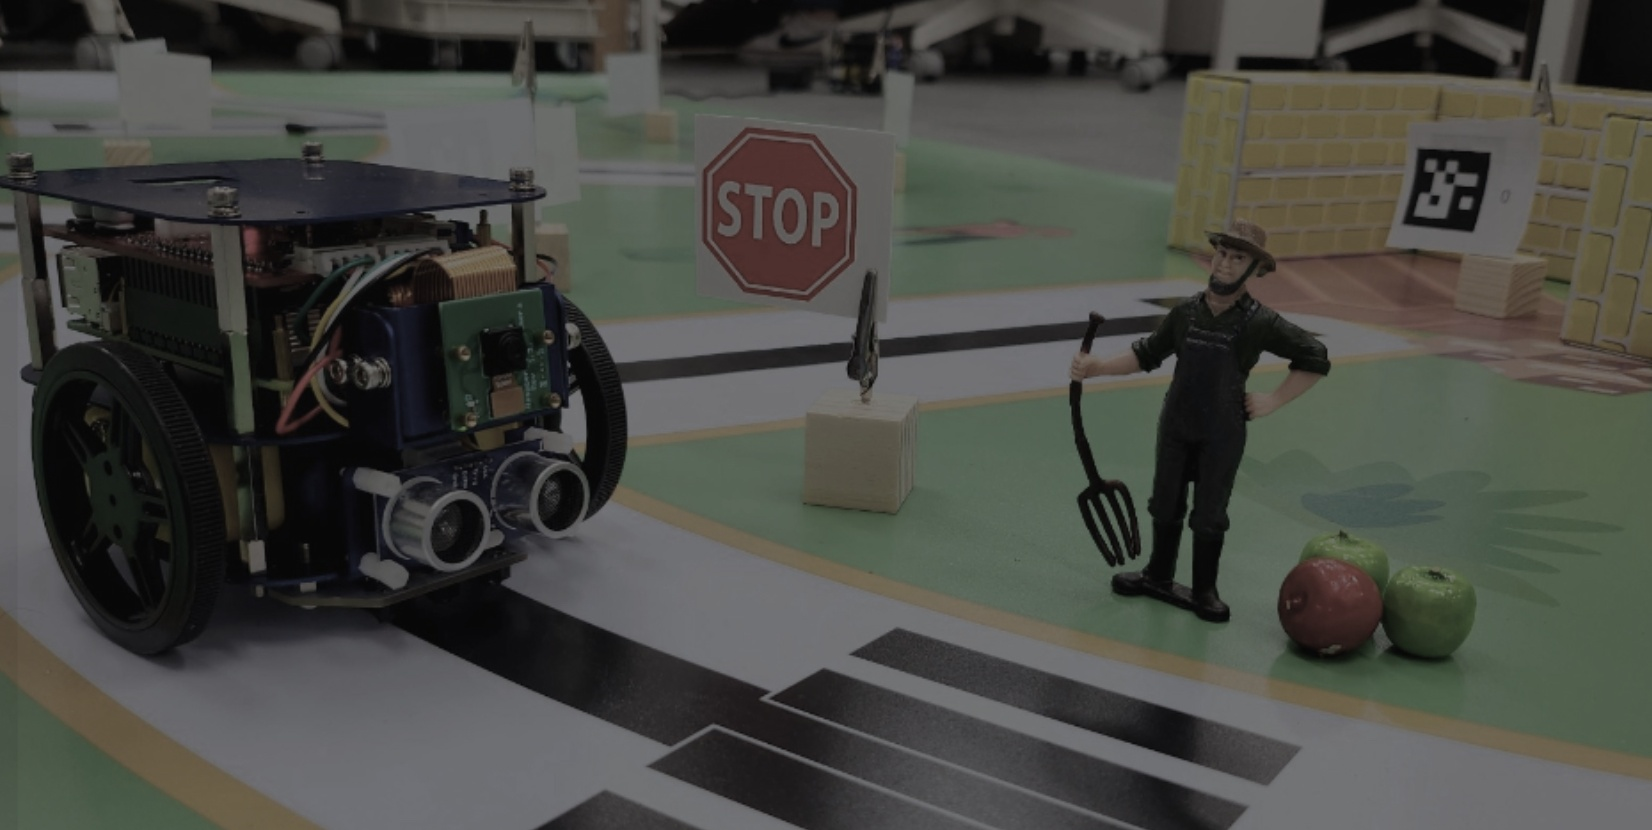

In [23]:
sample = cv2.imread('./data/download1.jpeg')
edge_frame = convert_hsv(sample, ss=0.5, vs=0.5)
display_image(edge_frame)

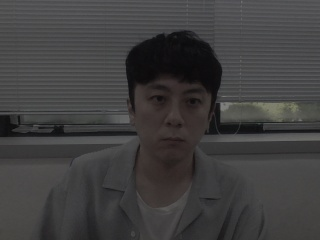

In [25]:
def run_convert_hsv(duration=5, camera_index=0, saturation_scale=1.0, value_scale=1.0):
    cap = init_cam(camera_index=camera_index)

    start = time.time()
    while time.time() - start < duration:
        ret, frame = cap.read()
        result = convert_hsv(frame, ss=saturation_scale, vs=value_scale)
        display_image(result)

    cap.release()


run_convert_hsv(saturation_scale=0.5, value_scale=0.5)

In [51]:
def compute_optical_flow(prev_gray, current_gray, pyr_scale=0.5, levels=3,
                         winsize=15, iterations=3, poly_n=5, poly_sigma=1.2):
    
    flow = cv2.calcOpticalFlowFarneback(
        prev_gray,
        current_gray,
        None,
        pyr_scale,
        levels,
        winsize,
        iterations,
        poly_n,
        poly_sigma,
        0
    )

    return flow

In [52]:
def draw_flow_vectors(frame, flow, step=16, color=(255,0,0),
                      thickness=1, tip_legnth=0.5):
    
    vis = frame.copy()
    h, w = flow.shape[:2]
    for y in range(0, h, step):
        for x in range(0, w, step):
            fx, fy = flow[y, x]
            end_point = (int(x + fx), int(y + fy))
            cv2.arrowedLine(vis, (x, y), end_point, color=color,
                            thickness=thickness, tipLength=tip_legnth)

    return vis

In [ ]:
def run_optical_flow(duration=5, camera_index=0, pyr_scale=0.5, levels=3,
                    winsize=15, iterations=3, poly_n=5, poly_sigma=1.2, step=16):
    
    cap = init_cam(camera_index=camera_index)
    prev_gray = None
    start = time.time()

    while time.time() - start < duration:
        ret, frame = cap.read()
        current_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


        if prev_gray is None:
            prev_gray = current_gray
            continue


        flow = compute_optical_flow(prev_gray, current_gray, pyr_scale=pyr_scale,
                                    levels=levels, winsize=winsize, iterations=iterations, poly_n=poly_n,
                                    poly_sigma=poly_sigma)
        
        vis = draw_flow_vectors(frame, flow, step=step)

        display_image(vis)
        prev_gray = current_gray

    cap.release()    

run_optical_flow()

[ WARN:0@211.871] global cap_v4l.cpp:914 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@211.871] global obsensor_uvc_stream_channel.cpp:163 getStreamChannelGroup Camera index out of range


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


: 

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from signal_processor import SignalProcessor

time = np.arange(0, 5+0.01, 0.01)
noise = np.random.normal(0, 0.5, size=time.shape)
signal = np.sin(time) + noise

sp = SignalProcessor(window_size=5, alpha=0.1)

ma_output = []
lp_output = []


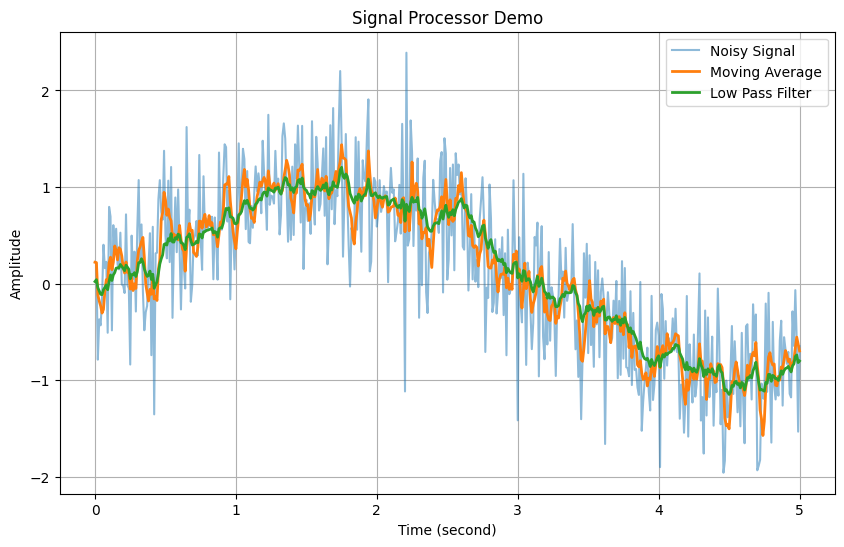

In [55]:
for val in signal:
    ma_output.append(sp.moving_average(val))
    lp_output.append(sp.low_pass_filter(val))



sp.plot_signals(time, signal, ma_output, lp_output)    

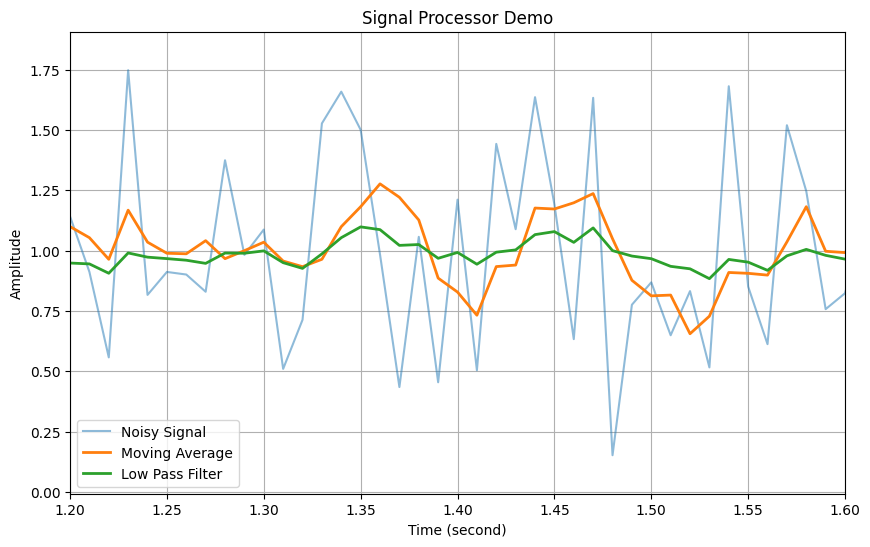

In [56]:
sp.plot_signals(time, signal, ma_output, lp_output, [1.2, 1.6])    

In [57]:
def low_pass_filter(self, new_value):
    filtered_value = self.alpha * new_value + (1 - alpha) * self._prev_filtered_value
    self._prev_filtered_value = filtered_value
    return filtered_value

In [58]:
time = np.arange(0, 4 + 0.01, 0.01)
square_wave = np.where((time % 2) < 1, 0, 2)
noise = np.random.normal(0, 0.2, size=time.shape)
signal = square_wave + noise

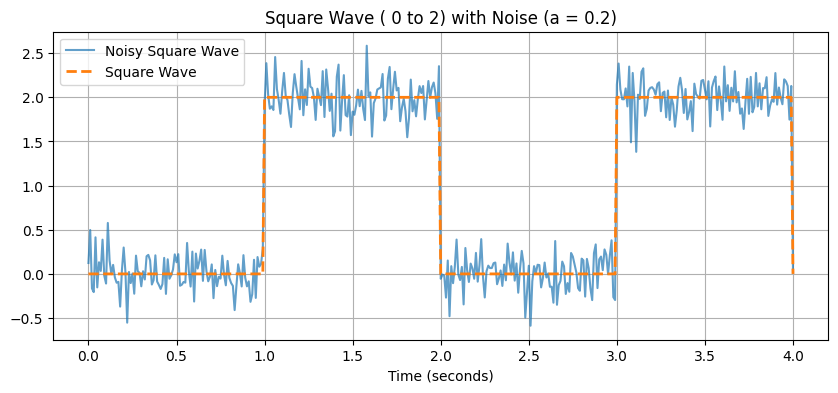

In [59]:
plt.figure(figsize=(10, 4))
plt.plot(time, signal, label='Noisy Square Wave', alpha=0.7)
plt.plot(time, square_wave, label='Square Wave', linewidth=2, linestyle="--")
plt.xlabel('Time (seconds)')
plt.title('Square Wave ( 0 to 2) with Noise (a = 0.2)')
plt.legend(); plt.grid(True)
plt.show()

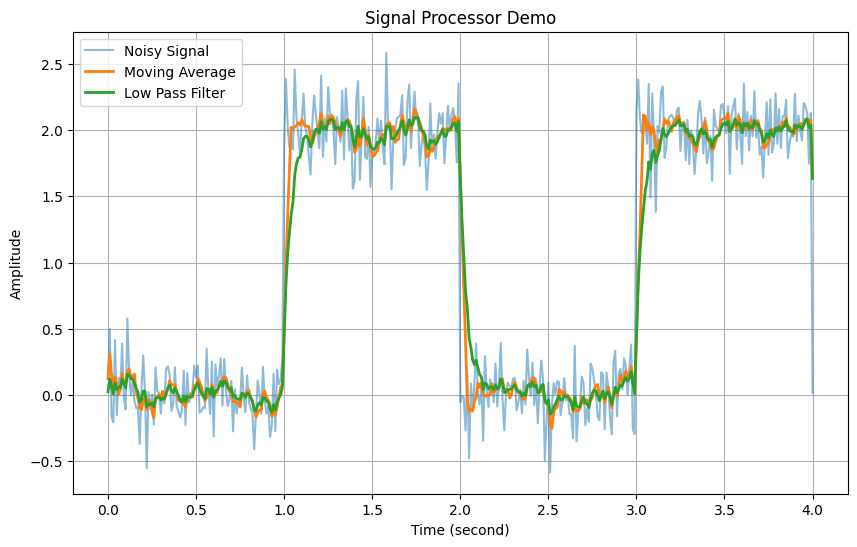

In [60]:
sp = SignalProcessor(window_size=5, alpha=0.2)

ma_output = []
lp_output = []

for val in signal:
    ma_output.append(sp.moving_average(val))
    lp_output.append(sp.low_pass_filter(val))

sp.plot_signals(time, signal, ma_output, lp_output)

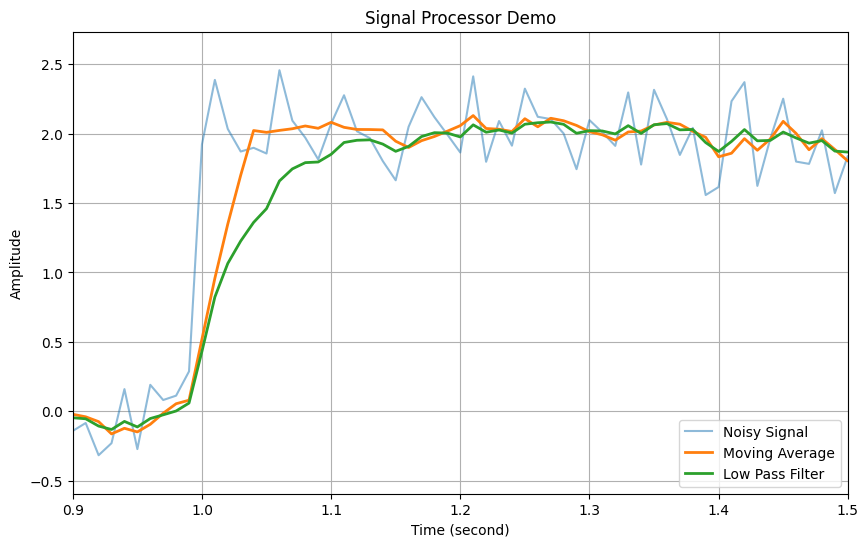

In [61]:
sp.plot_signals(time, signal, ma_output, lp_output, [0.9, 1.5])

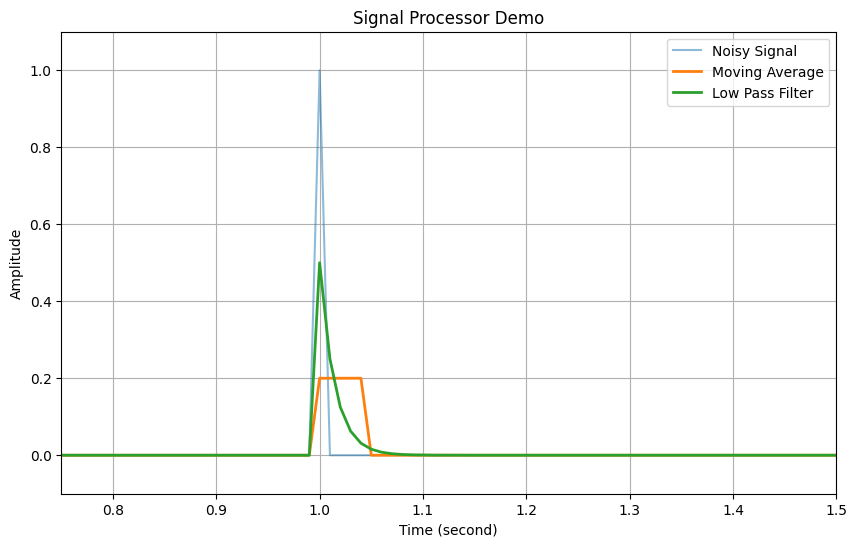

In [62]:
time = np.arange(0, 2 + 0.01, 0.01)
signal = np.where(np.isclose(time, 1, atol=1e-8), 1, 0)

sp = SignalProcessor(window_size=5, alpha=0.5)

ma_output = []
lp_output = []

for val in signal:
    ma_output.append(sp.moving_average(val))
    lp_output.append(sp.low_pass_filter(val))

sp.plot_signals(time, signal, ma_output, lp_output, [0.75, 1.5])



/home/taemin/venv/opencv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/taemin/venv/opencv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/taemin/venv/opencv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/taemin/venv/opencv/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


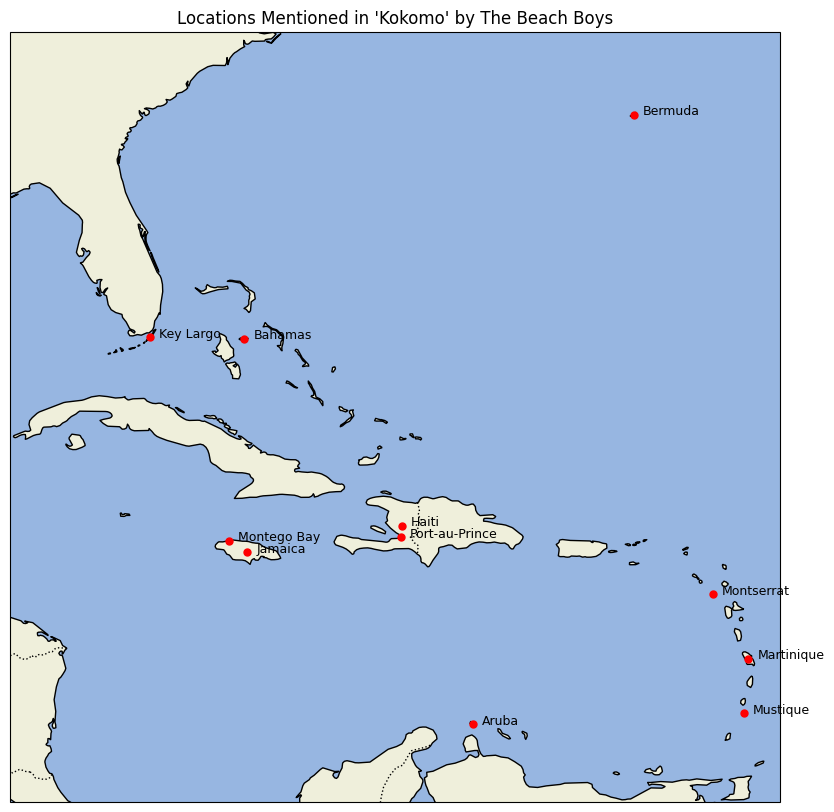

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 주요 장소의 위도와 경도
locations = {
    "Aruba": (12.5211, -69.9683),
    "Jamaica": (18.1096, -77.2975),
    "Bermuda": (32.3078, -64.7505),
    "Bahamas": (25.0343, -77.3963),
    "Key Largo": (25.0865, -80.4473),
    "Montego Bay": (18.4762, -77.8939),
    "Martinique": (14.6415, -61.0242),
    "Mustique": (12.8775, -61.1790),
    "Port-au-Prince": (18.5944, -72.3074),
    "Haiti": (18.9712, -72.2852),
    "Montserrat": (16.7425, -62.1874)
}

# 지도 설정
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-85, -60, 10, 35], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 위치 표시
for name, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())
    ax.text(lon + 0.3, lat, name, fontsize=9, transform=ccrs.PlateCarree())

plt.title("Locations Mentioned in 'Kokomo' by The Beach Boys")
plt.show()
